# Trabajo Práctico 4

# Imports y función de entrenamiento

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt

# Ejercicio 1

## Entrenamiento

In [78]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [79]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

c:\Users\Certi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_125 (Conv2D)             │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,506 (1.60 MB)

 Trainable params: 418,506 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.2713 - loss: 1.9334 - val_accuracy: 0.5128 - val_loss: 1.3338
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5472 - loss: 1.2479 - val_accuracy: 0.6164 - val_loss: 1.0783
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6402 - loss: 1.0236 - val_accuracy: 0.6465 - val_loss: 1.0169
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6909 - loss: 0.8773 - val_accuracy: 0.6770 - val_loss: 0.9292
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7387 - loss: 0.7392 - val_accuracy: 0.6902 - val_loss: 0.8946
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7684 - loss: 0.6624 - val_accuracy: 0.7058 - val_loss: 0.8492
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7980 - loss: 0.5769 - val_accuracy: 0.6895 - val_loss: 0.9388
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8278 -

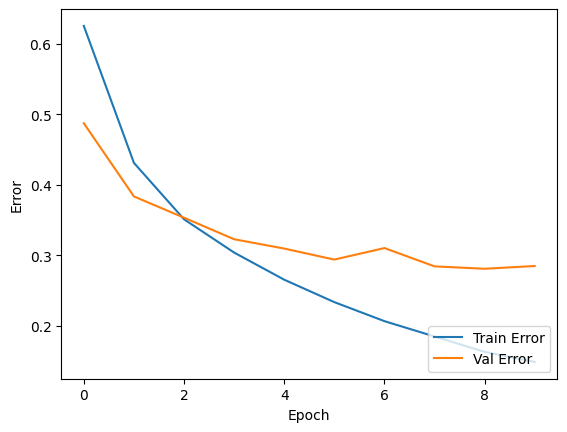

313/313 - 2s - 5ms/step - accuracy: 0.6968 - loss: 0.9702


Error en test: 0.30320000648498535


In [82]:
plt.plot([1-a for a in history.history['accuracy']], label='Train Error')
plt.plot([1-a for a in history.history['val_accuracy']], label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n")
print(f"Error en test: {1-test_acc}")

## Análisis

# Ejercicio 2

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
dropout_vals = [0.2, 0.5]
models_one_dropout = {}
models_two_dropout = {}

## Una capa de Dropout

In [4]:
for rate in dropout_vals:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.Dropout(rate))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

    models_one_dropout[rate] = {'model': model, 'history': history}

c:\Users\Certi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3179 - loss: 1.8091 - val_accuracy: 0.5309 - val_loss: 1.2795
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5534 - loss: 1.2412 - val_accuracy: 0.6014 - val_loss: 1.1322
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6474 - loss: 0.9935 - val_accuracy: 0.6418 - val_loss: 1.0066
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7022 - loss: 0.8506 - val_accuracy: 0.6888 - val_loss: 0.9038
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7410 - loss: 0.7417 - val_accuracy: 0.7089 - val_loss: 0.8450
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7773 - loss: 0.6451 - val_accuracy: 0.7260 - val_loss: 0.8025
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7955 - loss: 0.5791 - val_accuracy: 0.7292 - val_loss: 0.7998
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8197 -

## Dos capas de Dropout

In [5]:
for rate in dropout_vals:
    for rate2 in dropout_vals:
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.Dropout(rate))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(rate2))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(10))

        model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

        history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

        models_two_dropout[(rate, rate2)] = {'model': model, 'history': history}

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2847 - loss: 1.8882 - val_accuracy: 0.5007 - val_loss: 1.3898
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5032 - loss: 1.3478 - val_accuracy: 0.5583 - val_loss: 1.2228
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5877 - loss: 1.1569 - val_accuracy: 0.6498 - val_loss: 1.0124
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6481 - loss: 1.0011 - val_accuracy: 0.6703 - val_loss: 0.9511
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6824 - loss: 0.9050 - val_accuracy: 0.6787 - val_loss: 0.9070
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7148 - loss: 0.8244 - val_accuracy: 0.6957 - val_loss: 0.8760
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7307 - loss: 0.7637 - val_accuracy: 0.7082 - val_loss: 0.8427
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7519 -

## Gráfico y test errors

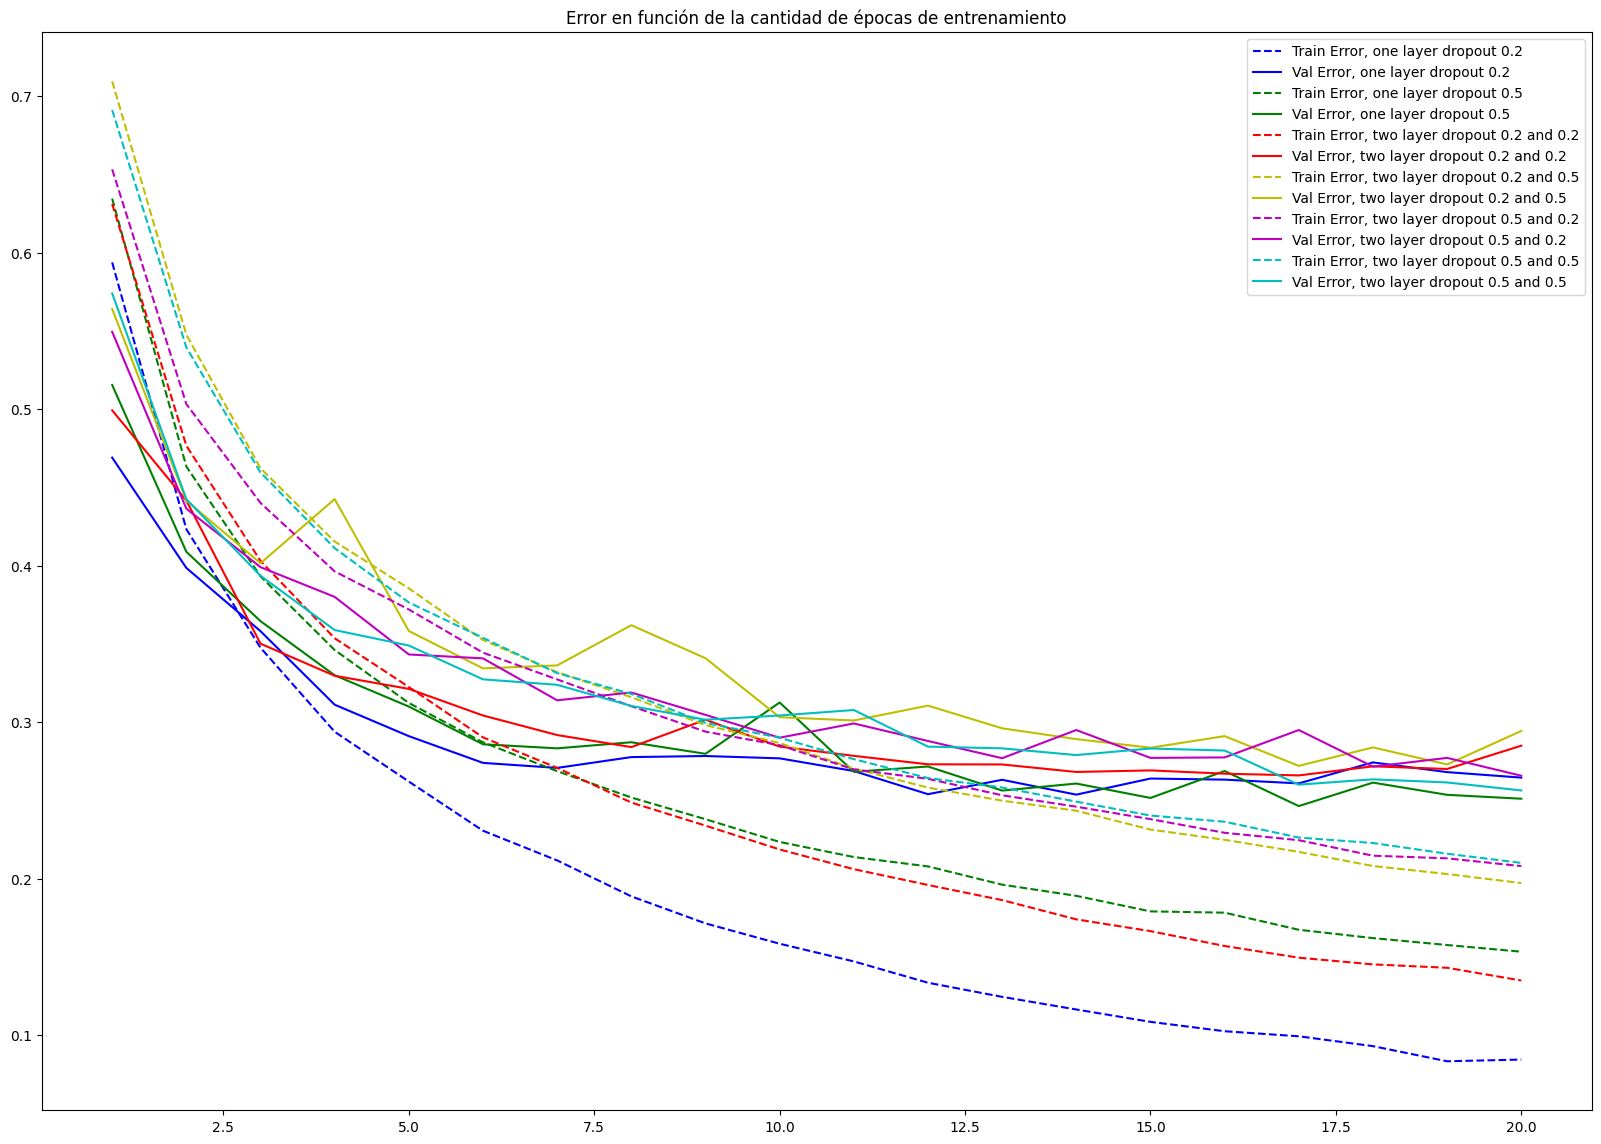

In [6]:
ranges = range(1, 21)
colors=['b', 'g', 'r', 'y', 'm', 'c']
i_color = 0
plt.figure(figsize=(20, 14))
for r, m in models_one_dropout.items():
    plt.plot(ranges, [1-a for a in m['history'].history['accuracy']], label=f'Train Error, one layer dropout {r}', linestyle='--', color=colors[i_color])
    plt.plot(ranges, [1-a for a in m['history'].history['val_accuracy']], label=f'Val Error, one layer dropout {r}', linestyle='-', color=colors[i_color])
    i_color += 1

for (r1, r2), m in models_two_dropout.items():
    plt.plot(ranges, [1-a for a in m['history'].history['accuracy']], label=f'Train Error, two layer dropout {r1} and {r2}', linestyle='--', color=colors[i_color])
    plt.plot(ranges, [1-a for a in m['history'].history['val_accuracy']], label=f'Val Error, two layer dropout {r1} and {r2}', linestyle='-', color=colors[i_color])
    i_color += 1

plt.title(f'Error en función de la cantidad de épocas de entrenamiento')
plt.legend()

In [7]:
for r, m in models_one_dropout.items():
    test_loss, test_acc = m['model'].evaluate(test_images,  test_labels, verbose=2)
    print(f"Error en test, one layer dropout {r}: {1-test_acc}")
    print("\n")

for (r1, r2), m in models_two_dropout.items():
    test_loss, test_acc = m['model'].evaluate(test_images,  test_labels, verbose=2)
    print(f"Error en test, two layer dropout {r1} and {r2}: {1-test_acc}")
    print("\n")

313/313 - 2s - 5ms/step - accuracy: 0.7139 - loss: 1.2032
Error en test, one layer dropout 0.2: 0.28609997034072876


313/313 - 1s - 5ms/step - accuracy: 0.7470 - loss: 0.8403
Error en test, one layer dropout 0.5: 0.25300002098083496


313/313 - 1s - 5ms/step - accuracy: 0.7128 - loss: 0.9423
Error en test, two layer dropout 0.2 and 0.2: 0.2871999740600586


313/313 - 1s - 4ms/step - accuracy: 0.7033 - loss: 0.8875
Error en test, two layer dropout 0.2 and 0.5: 0.29670000076293945


313/313 - 1s - 4ms/step - accuracy: 0.7248 - loss: 0.8202
Error en test, two layer dropout 0.5 and 0.2: 0.2752000093460083


313/313 - 2s - 5ms/step - accuracy: 0.7448 - loss: 0.7808
Error en test, two layer dropout 0.5 and 0.5: 0.25520002841949463




## Análisis

# Ejercicio 3

In [89]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [90]:
dropout_val = 0.5

img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

c:\Users\Certi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Dropout(dropout_val))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [92]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.2594 - loss: 1.9789 - val_accuracy: 0.4636 - val_loss: 1.4711
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.4446 - loss: 1.5141 - val_accuracy: 0.5205 - val_loss: 1.3333
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.4979 - loss: 1.3713 - val_accuracy: 0.5352 - val_loss: 1.3099
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.5326 - loss: 1.2987 - val_accuracy: 0.5779 - val_loss: 1.1916
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5609 - loss: 1.2320 - val_accuracy: 0.6157 - val_loss: 1.1062
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5797 - loss: 1.1846 - val_accuracy: 0.5924 - val_loss: 1.1531
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.5887 - loss: 1.1517 - val_accuracy: 0.6314 - val_loss: 1.0426
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.6005 -

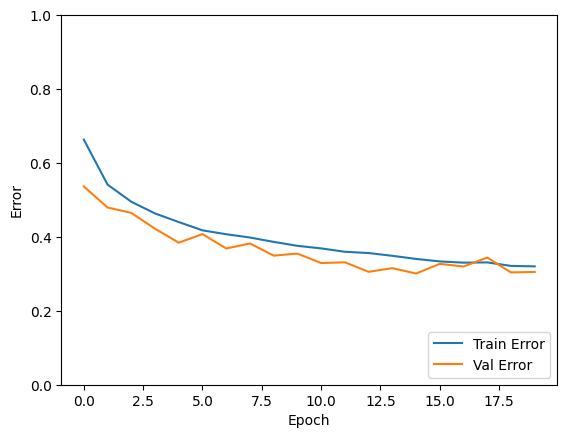

313/313 - 2s - 5ms/step - accuracy: 0.6955 - loss: 0.9243


Error en test: 0.3044999837875366


In [93]:
plt.plot([1-a for a in history.history['accuracy']], label='Train Error')
plt.plot([1-a for a in history.history['val_accuracy']], label = 'Val Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n")
print(f"Error en test: {1-test_acc}")

# Ejercicio 4